In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [18]:
df = pd.read_csv('laptop_price.csv')

In [19]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [20]:
print(df.shape)

(1303, 13)


In [21]:
print(df.dtypes)

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object


In [22]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [23]:
df['Inches'] = df['Inches'].apply(str)
df['Weight'] = df['Weight'].apply(lambda x: str(x).split('k')[0])

In [24]:
df['Weight'] = df['Weight'].apply(float)

Text(0.5, 1.0, 'Average Laptop Price Per Company')

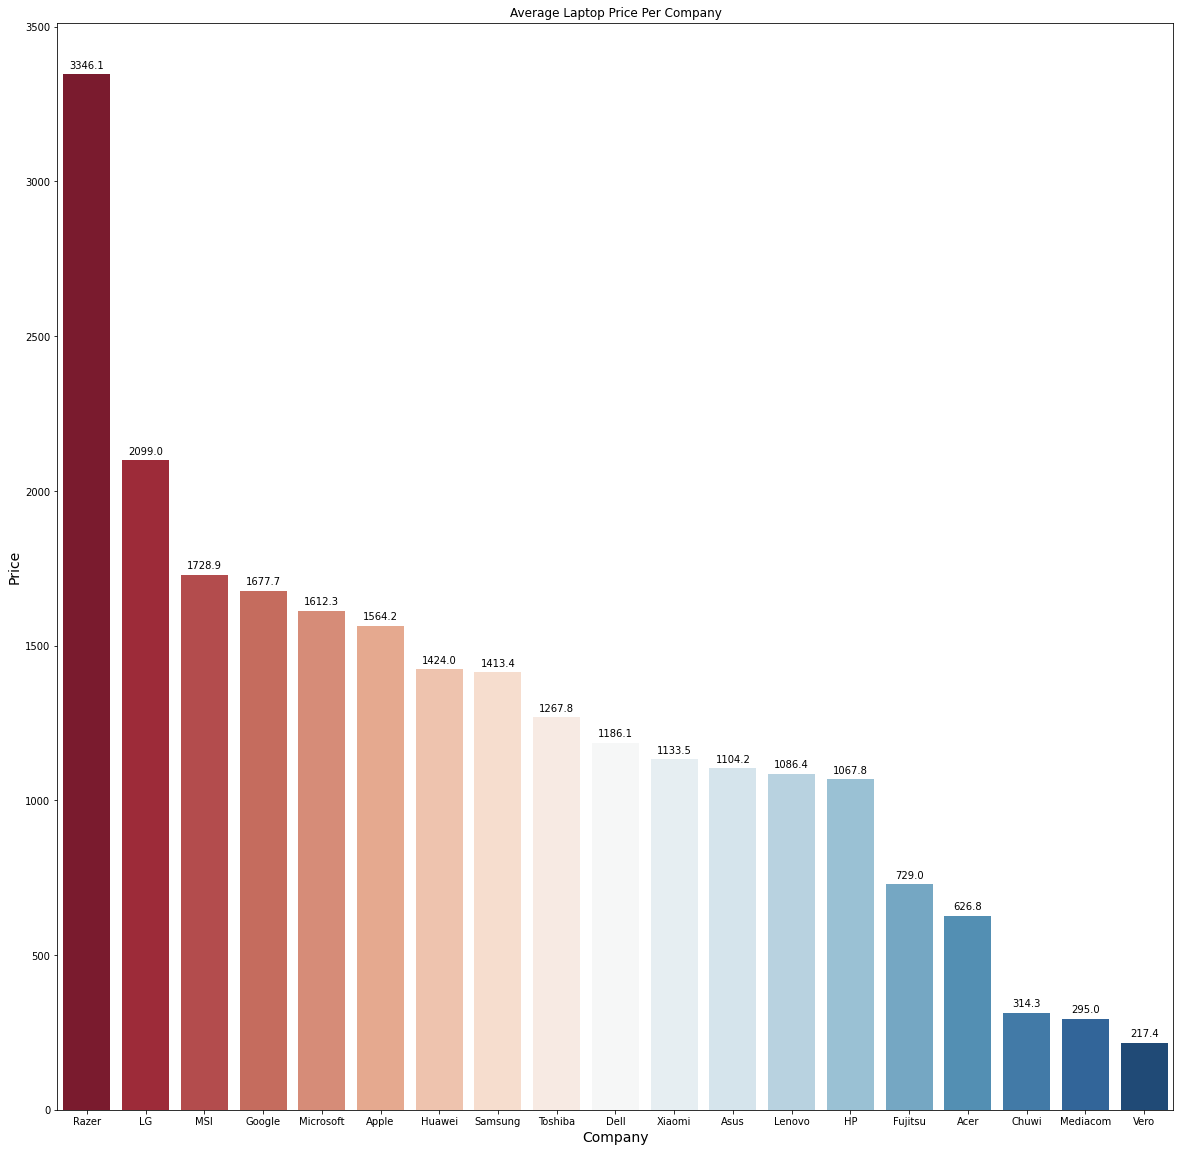

In [25]:
temp = df.groupby(['Company']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
plt.figure(figsize = (20,20))
splot = sns.barplot(data = temp,x = 'Company', y = 'Price_euros',palette = 'RdBu')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Company", size=14)
plt.ylabel("Price", size=14)
plt.title('Average Laptop Price Per Company')

In [28]:
df = df[~((df['Price_euros'] > 3500) &(df['Ram']== '8GB'))]
df = df[~((df['Price_euros'] > 3500) &(df['Ram']== '16GB'))]

In [29]:
df = df[~((df['Price_euros'] == 4899) &(df['Inches']== 15.6))]
df = df[~((df['Price_euros'] >= 5000) &(df['Inches']== 17.3))]

In [30]:
temp = df.groupby(['Company','Memory']).mean().reset_index().sort_values(by='Price_euros',ascending=False)

In [31]:
temp = df.groupby(['Company','Inches']).mean().reset_index().sort_values(by='Price_euros',ascending=False)

<AxesSubplot:>

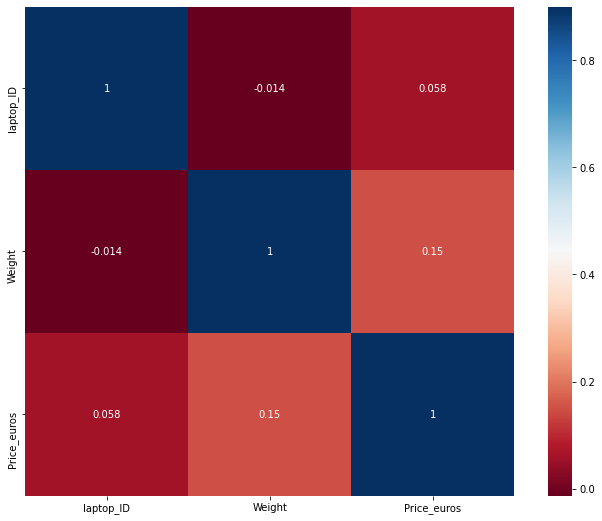

In [34]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = 'RdBu',annot = True)

In [35]:
df.drop(columns = 'laptop_ID',inplace = True)

In [36]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys']
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [38]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,7,23,65,8,4,58,8,1.37,7.200940
1,1,301,4,7,1,63,8,2,51,8,1.34,6.802328
2,7,50,3,14,8,74,8,16,53,4,1.86,6.356108
3,1,300,4,13,25,85,1,29,9,8,1.83,7.839309
4,1,300,4,7,23,67,8,16,59,8,1.37,7.498094


In [39]:
download = df.to_csv('laptopPrice.csv',index = False)